In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('teste2_dados_2k_v2.txt') as f:
    lines = f.readlines()

In [3]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==600:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

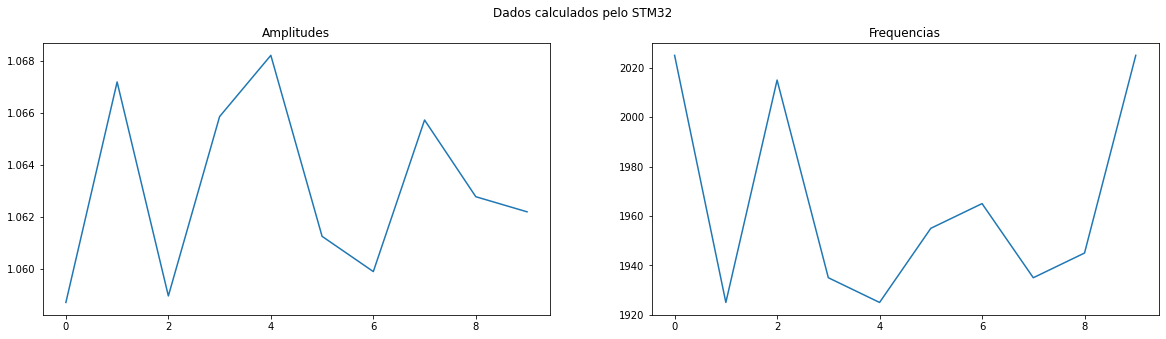

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [5]:
dados.shape

(10, 600)

In [6]:
linha = 1

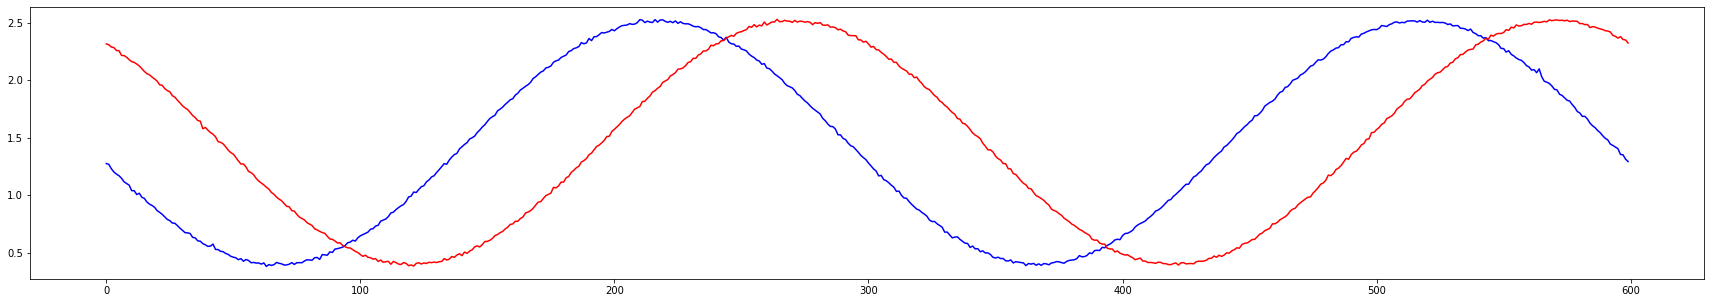

In [7]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[linha,:limite]*k,'b-')
plt.plot(dados[0,:limite]*k,'r-')
plt.show()

In [8]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [9]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [10]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

df = 2000.0


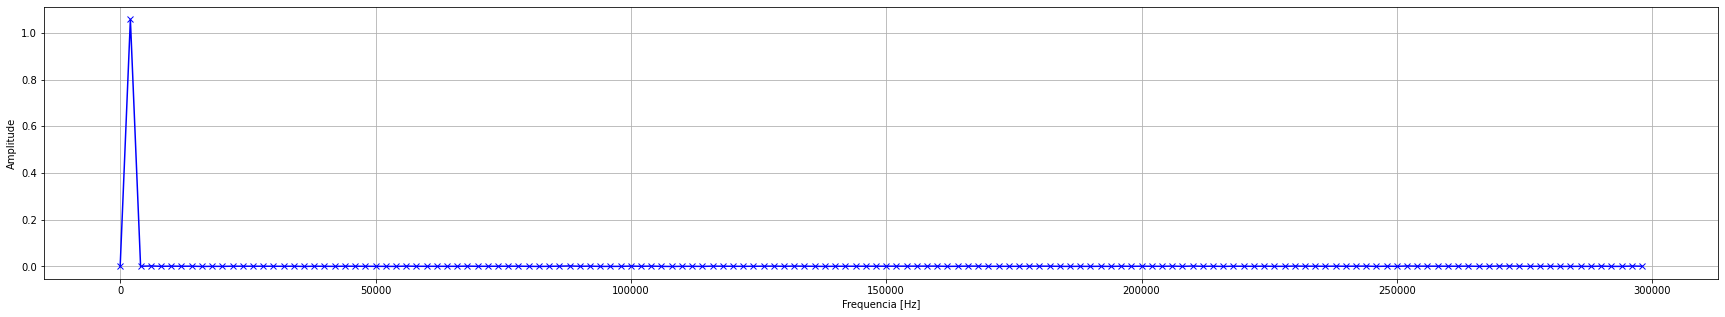

In [11]:
npontos = 300
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

df = 1000.0


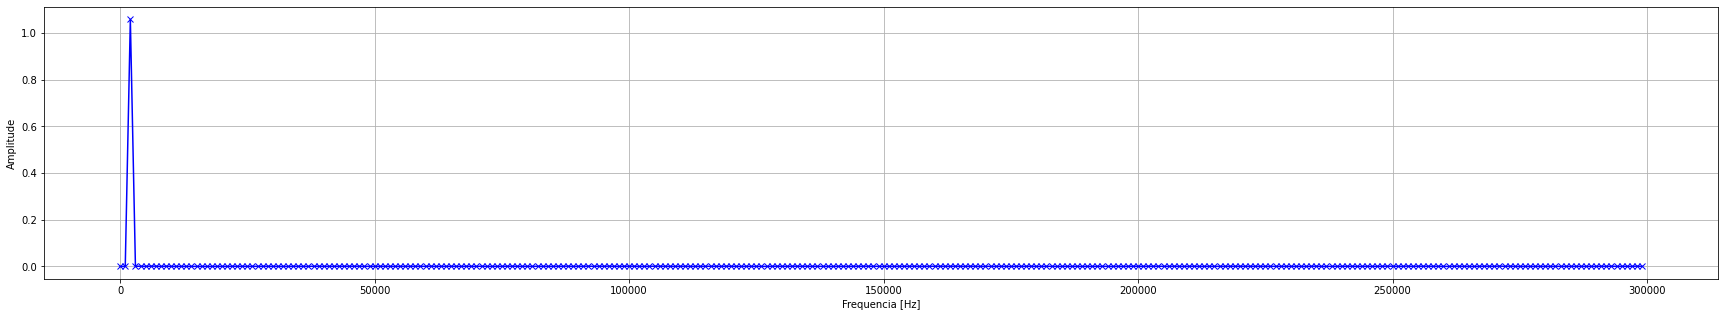

In [12]:
npontos = 600
ffty, df = print_fft((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,600000)

In [13]:
frequencia = 2000
sample_freq = 600000
npontos_range = range(300,600,10)
componentes = [componente_precisa((dados[linha,:npontos]-np.mean(dados[linha,:npontos]))*k,
                                  frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

Text(0, 0.5, 'Componente em f=2000Hz')

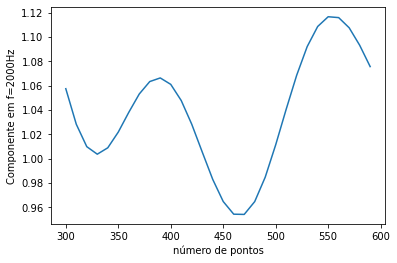

In [14]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [15]:
frequencia = 2000
sample_freq = 600000
npontos = 300
inicio_range = range(0,600-npontos-1,10)
componentes = [componente_precisa((dados[linha,inicio:inicio+npontos]-np.mean(dados[linha,inicio:inicio+npontos]))*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

Text(0, 0.5, 'Componente em f=2000Hz')

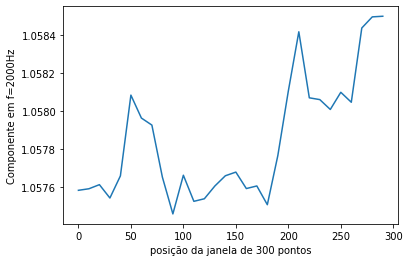

In [16]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

In [17]:
frequencia_range = range(1700,2100,1)
sample_freq = 600000
inicio_pontos = 0
npontos = 300
componentes = [componente_precisa((dados[linha,inicio_pontos:inicio_pontos+npontos]-
                                   np.mean(dados[linha,inicio_pontos:inicio_pontos+npontos]))*k,
                                  frequencia_i,sample_freq, fator_zeros=100000) 
               for frequencia_i in frequencia_range]

In [18]:
frequencia_range2 = range(1700,2100,1)
sample_freq = 600000
npontos2 = 600
componentes2 = [componente_precisa((dados[linha,:npontos2]-np.mean(dados[linha,:npontos2]))*k,
                                   frequencia_i,sample_freq, fator_zeros=100000)
                for frequencia_i in frequencia_range2]

In [19]:
idx_pico = np.argmax(componentes)
print(idx_pico)

0


In [20]:
# olhando 300 pontos
for pontos in range(0,100,5):
    erro_perc = ((componentes[idx_pico]-componentes[idx_pico-pontos])/componentes[idx_pico])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 5Hz	Erro: 6.146445208381707%
dif freq: 10Hz	Erro: 6.001665709893428%
dif freq: 15Hz	Erro: 5.8584533260097675%
dif freq: 20Hz	Erro: 5.7168146943329985%
dif freq: 25Hz	Erro: 5.576756414830527%
dif freq: 30Hz	Erro: 5.438285049576256%
dif freq: 35Hz	Erro: 5.301407122493503%
dif freq: 40Hz	Erro: 5.166129119097543%
dif freq: 45Hz	Erro: 5.032457486240508%
dif freq: 50Hz	Erro: 4.9003986318575805%
dif freq: 55Hz	Erro: 4.769958924713195%
dif freq: 60Hz	Erro: 4.641144694149681%
dif freq: 65Hz	Erro: 4.513962229835928%
dif freq: 70Hz	Erro: 4.3884177815184975%
dif freq: 75Hz	Erro: 4.264517558772572%
dif freq: 80Hz	Erro: 4.142267730754967%
dif freq: 85Hz	Erro: 4.021674425958625%
dif freq: 90Hz	Erro: 3.9027437319670364%
dif freq: 95Hz	Erro: 3.7854816952114283%


In [21]:
# olhando 600 pontos
idx_pico2 = np.argmax(componentes2)
for pontos in range(0,40,2):
    erro_perc = ((componentes2[idx_pico2]-componentes2[idx_pico2-pontos])/componentes[idx_pico2])*100
    print(f'dif freq: {pontos}Hz\tErro: {erro_perc}%')

dif freq: 0Hz	Erro: 0.0%
dif freq: 2Hz	Erro: 0.0007381399201324764%
dif freq: 4Hz	Erro: 0.002771553568548728%
dif freq: 6Hz	Erro: 0.0061009420851822%
dif freq: 8Hz	Erro: 0.010726977654865123%
dif freq: 10Hz	Erro: 0.01665030347291097%
dif freq: 12Hz	Erro: 0.023871533708815812%
dif freq: 14Hz	Erro: 0.032391253472068185%
dif freq: 16Hz	Erro: 0.04221001877853767%
dif freq: 18Hz	Erro: 0.05332835651690491%
dif freq: 20Hz	Erro: 0.06574676441643519%
dif freq: 22Hz	Erro: 0.07946571101613702%
dif freq: 24Hz	Erro: 0.09448563563255634%
dif freq: 26Hz	Erro: 0.11080694833118836%
dif freq: 28Hz	Erro: 0.12843002989590474%
dif freq: 30Hz	Erro: 0.14735523180127497%
dif freq: 32Hz	Erro: 0.16758287618379192%
dif freq: 34Hz	Erro: 0.18911325581580563%
dif freq: 36Hz	Erro: 0.2119466340784852%
dif freq: 38Hz	Erro: 0.2360832449361866%


In [22]:
for idx,(c,f) in enumerate(zip(componentes,frequencia_range)):
    print(f'{idx}\t{c}\t{f}')

0	1.0978747795788544	1700
1	1.0978637197724588	1701
2	1.0978518021599377	1702
3	1.097839027010621	1703
4	1.0978253945947793	1704
5	1.0978109051836207	1705
6	1.0977955590492967	1706
7	1.0977793564648934	1707
8	1.0977622977044392	1708
9	1.0977443830429015	1709
10	1.0977256127561787	1710
11	1.0977059871211123	1711
12	1.097685506415478	1712
13	1.0976641709179886	1713
14	1.0976419809082871	1714
15	1.0976189366669595	1715
16	1.0975950384755195	1716
17	1.0975702866164163	1717
18	1.0975446813730354	1718
19	1.0975182230296912	1719
20	1.0974909118716305	1720
21	1.0974627481850343	1721
22	1.0974337322570105	1722
23	1.097403864375603	1723
24	1.0973731448297794	1724
25	1.097341573909442	1725
26	1.0973091519054199	1726
27	1.097275879109469	1727
28	1.097241755814275	1728
29	1.0972067823134508	1729
30	1.0971709589015373	1730
31	1.0971342858739954	1731
32	1.0970967635272193	1732
33	1.0970583921585237	1733
34	1.0970191720661482	1734
35	1.0969791035492564	1735
36	1.0969381869079382	1736
37	1.096896422443

In [23]:
for idx,(c,f) in enumerate(zip(componentes2,frequencia_range2)):
    print(f'{idx}\t{c}\t{f}')

0	0.9787808508457259	1700
1	0.9795528785560682	1701
2	0.9803217062544798	1702
3	0.9810873305086337	1703
4	0.9818497479052034	1704
5	0.9826089550498878	1705
6	0.9833649485674282	1706
7	0.9841177251016158	1707
8	0.9848672813153142	1708
9	0.9856136138904745	1709
10	0.9863567195281505	1710
11	0.9870965949485114	1711
12	0.9878332368908616	1712
13	0.988566642113655	1713
14	0.9892968073945059	1714
15	0.9900237295302077	1715
16	0.9907474053367504	1716
17	0.9914678316493284	1717
18	0.9921850053223594	1718
19	0.9928989232295009	1719
20	0.9936095822636604	1720
21	0.9943169793370091	1721
22	0.9950211113809996	1722
23	0.9957219753463793	1723
24	0.9964195682032035	1724
25	0.9971138869408448	1725
26	0.9978049285680168	1726
27	0.9984926901127741	1727
28	0.9991771686225385	1728
29	0.9998583611641061	1729
30	1.0005362648236575	1730
31	1.0012108767067764	1731
32	1.0018821939384592	1732
33	1.0025502136631295	1733
34	1.003214933044646	1734
35	1.0038763492663236	1735
36	1.0045344595309396	1736
37	1.00518926

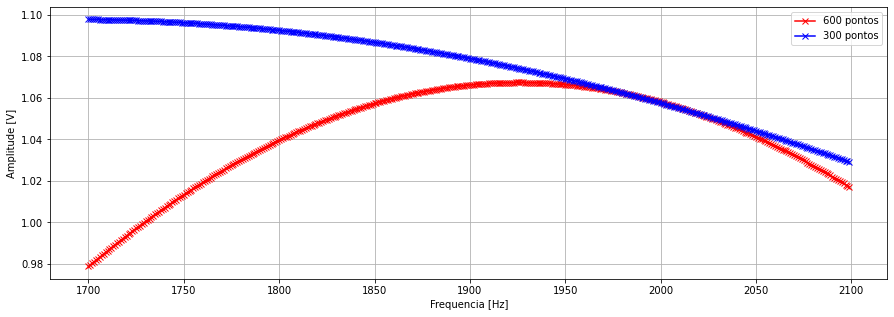

In [24]:
plt.figure(figsize=(15,5))
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.ylabel(f'Amplitude [V]')
plt.xlabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

In [25]:
dados.shape[0]

10

In [26]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 300
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.062349654354212	2100	1.062302396057283	1.062349654354212	1.0623092876254303
1	1.0979381397269958	1690	1.097915430003847	1.0979381397269958	1.0978747795788544
2	1.0605113095224437	2060	1.0604993596666794	1.0605113095224437	1.060439334949443
3	1.0939087090722024	1710	1.093904692696203	1.0939087090722024	1.0938282594806032
4	1.1012838093110782	1680	1.1012374253395294	1.1012838093110782	1.1012431801301292
5	1.0742331180918092	1800	1.0741546779789097	1.0742331180918092	1.074232739029991
6	1.066572445820572	1850	1.0665053394737336	1.066572445820572	1.0665619569127984
7	1.0921456479587455	1710	1.0921113841229428	1.0921456479587455	1.0920957433954845
8	1.081827450037872	1750	1.0817830866630975	1.081827450037872	1.081790628130818
9	1.0801812267740711	2210	1.0801559349258008	1.0801812267740711	1.080105649396228


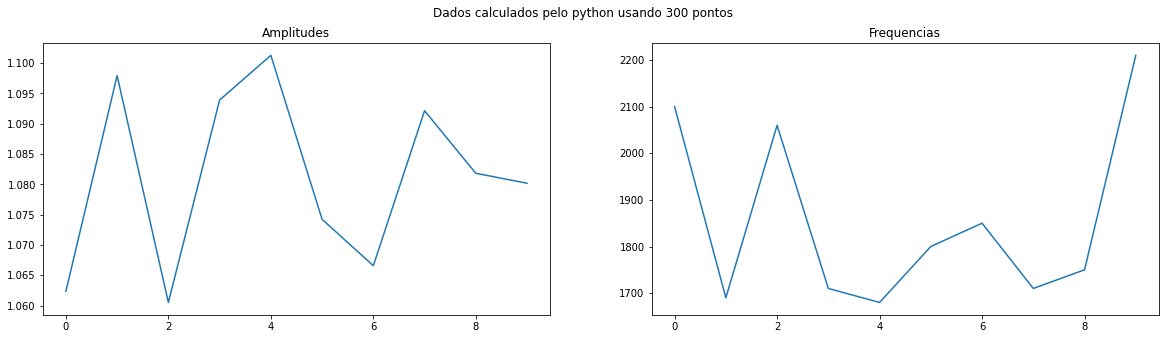

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos')
plt.show()

In [28]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000
    componentes2 = [componente_precisa((dados[frame,:npontos2]-np.mean(dados[frame,:npontos2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0589335808292664	2020	1.0585932058948297	1.0589335808292664	1.0589258196412956
1	1.0674225158429769	1930	1.067382832107234	1.0674225158429769	1.0671149892055631
2	1.0592100469988335	2010	1.0589249124238276	1.0592100469988335	1.0591505383161446
3	1.0661348613927084	1930	1.0659118739603373	1.0661348613927084	1.0660119741006395
4	1.0684335061575985	1920	1.0681012521599005	1.0684335061575985	1.0684169118231028
5	1.0614774507295373	1950	1.061149305146927	1.0614774507295373	1.0614647203840408
6	1.0601418511633207	1970	1.0600920208648998	1.0601418511633207	1.05985249489807
7	1.0659920427836975	1930	1.0657485087502943	1.0659920427836975	1.0658897066206325
8	1.0630426200593373	1940	1.0627971508747607	1.0630426200593373	1.062945297567649
9	1.064199373551244	2060	1.0641542480678747	1.064199373551244	1.0638809144631605


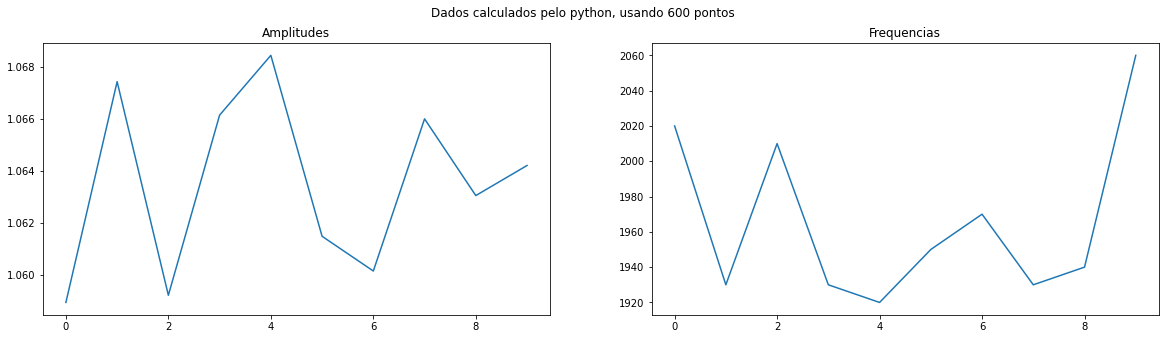

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 600 pontos')
plt.show()

In [30]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 300000
    componentes2 = [componente_precisa((dados[frame,:npontos2:2]-np.mean(dados[frame,:npontos2:2]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.058211591188097	2030	1.0581630967665836	1.058211591188097	1.0579113218691993
1	1.0685835039776586	1930	1.0685617496157203	1.0685835039776586	1.0682575899622124
2	1.0584968319390273	2010	1.058259836963748	1.0584968319390273	1.0583896044928833
3	1.0655132097993119	1930	1.0653126903218837	1.0655132097993119	1.0653679163003265
4	1.0680413189548406	1920	1.0677422380850803	1.0680413189548406	1.0679913248362454
5	1.0622734076088967	1950	1.061980053428331	1.0622734076088967	1.0622260783517068
6	1.0593625988920845	1970	1.0593518629897172	1.0593625988920845	1.0590344935416098
7	1.0656102201368978	1930	1.0653366927838486	1.0656102201368978	1.0655382509481393
8	1.0631096761596976	1940	1.062894871903001	1.0631096761596976	1.0629817219266395
9	1.0646451537765698	2060	1.0646375887400759	1.0646451537765698	1.0642893687628041


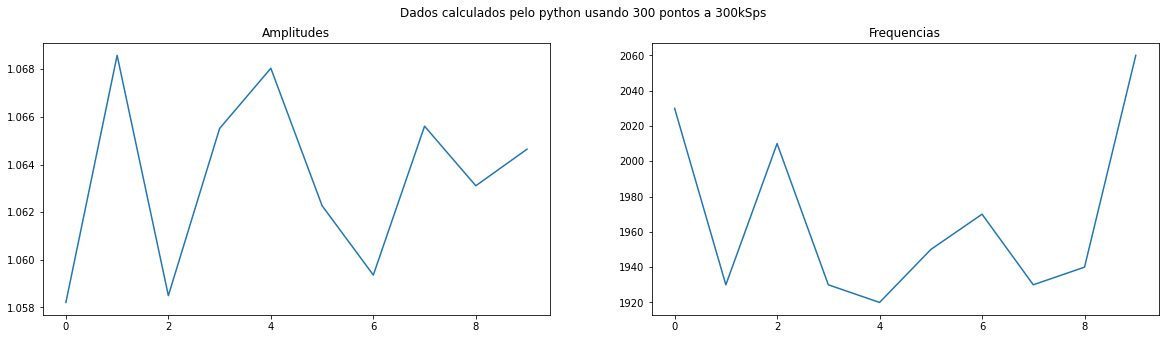

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python usando 300 pontos a 300kSps')
plt.show()

In [32]:
frequencia = 1900
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=dados.shape[0]
x = range(dados.shape[0])
downsampling = 5
npontos2 = 600
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-700,frequencia+700,10)
    sample_freq = 600000/downsampling
    componentes2 = [componente_precisa((dados[frame,:npontos2:downsampling]-np.mean(dados[frame,:npontos2:downsampling]))*k,
                                       frequencia_i,sample_freq, fator_zeros=100000)
                    for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    indice_pico = np.argmax(componentes2)
    frequenciaf = frequencia_range2[indice_pico]
    print(f'{frame}\t{amplitudes10[idx]}\t{frequenciaf}\t{componentes2[indice_pico-1]}\t{componentes2[indice_pico]}\t{componentes2[indice_pico+1]}')
    freqs10[idx] = frequenciaf

0	1.0603761644761982	2030	1.0601694056508313	1.0603761644761982	1.0602321278437108
1	1.0669652053428547	1920	1.0666485685378582	1.0669652053428547	1.0669334481865955
2	1.0591405868251234	2010	1.059027727508701	1.0591405868251234	1.0589101919329136
3	1.0663818776318408	1930	1.0662497674470435	1.0663818776318408	1.0661677908371752
4	1.0694652193864174	1920	1.069212033026052	1.0694652193864174	1.069368948941327
5	1.0596973061816504	1950	1.0595369984716547	1.0596973061816504	1.059516803301089
6	1.062944259967504	1960	1.0627902763480992	1.062944259967504	1.0627577071540493
7	1.065079026237444	1930	1.064736819052223	1.065079026237444	1.0650762281655386
8	1.0631378747690299	1940	1.0630307245250215	1.0631378747690299	1.0629018445601242
9	1.0623572068220215	2050	1.0621029600408405	1.0623572068220215	1.0622509736009849


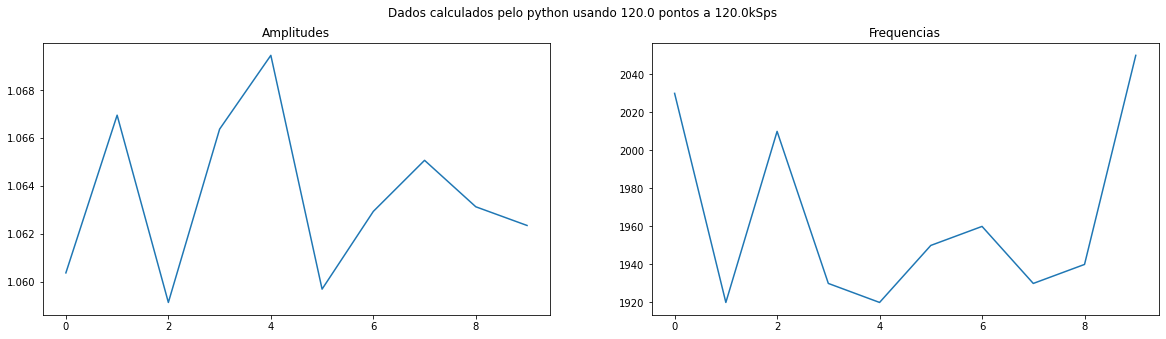

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
freq_usada = sample_freq/1000
npontos_usado = npontos2/downsampling
plt.suptitle(f'Dados calculados pelo python usando {npontos_usado} pontos a {freq_usada}kSps')
plt.show()

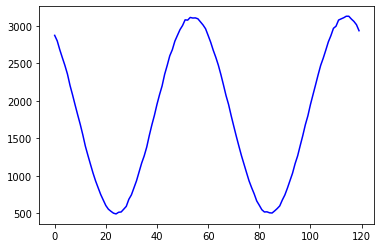

In [34]:
plt.plot(dados[0,:600:downsampling],'b') # amostrado a 300kSps

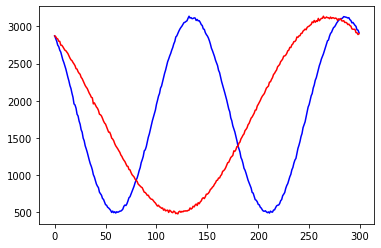

In [35]:
plt.plot(dados[0,:600:2],'b') # amostrado a 300kSps
plt.plot(dados[0,:300],'r') # amostrado a 600kSps